# Medical Insurance Cost Prediction

In [4]:
#### loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
df=pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


`observation`
- in the dataset we have 7 columns
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of dependents
- smoker: If the individual smokes or not
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance


- `Target variable` is **Charges**
  


`observation`
- type :- supervised ML
- task :- Regression
- Algorithm :- KNN,SVR,Linear REgression,Random forest etc.
- Evaluation matrix :- MSE,RMSE,MAE etc.
  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### EDA

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- there is no null value in the dataset

In [9]:
df.duplicated().sum()

1

- data set have 1 duplicated value removing it. 

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
df.shape

(1337, 7)

In [12]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [13]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

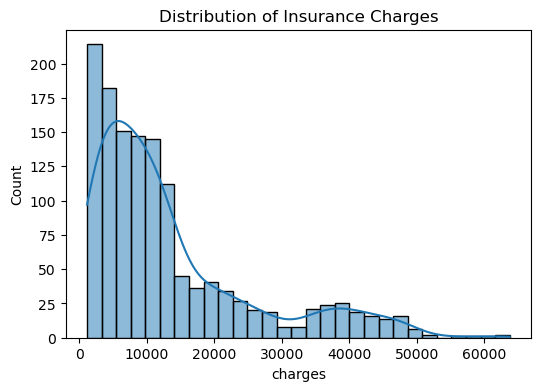

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df["charges"], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()


### Distribution of Insurance Charges – Insights

- The distribution of insurance charges is **right-skewed**, indicating that most individuals have relatively lower medical expenses, while a smaller number incur very high costs.
- The presence of high-value cases suggests that factors such as **smoking, age, and BMI** may significantly influence insurance charges.
- Since the target variable is skewed, **tree-based models** are likely to perform well in capturing complex patterns in the data.


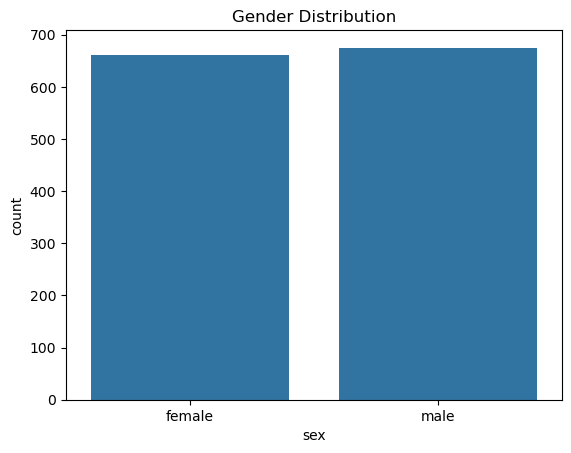

In [15]:
sns.countplot(x="sex", data=df)
plt.title("Gender Distribution")
plt.show()


### Gender Distribution – Insights

- The dataset shows a **nearly balanced distribution** between male and female individuals.
- Since both categories are well represented, the model is less likely to suffer from **gender-based data imbalance**.
- This balanced distribution helps in building a **fair and unbiased predictive model**.


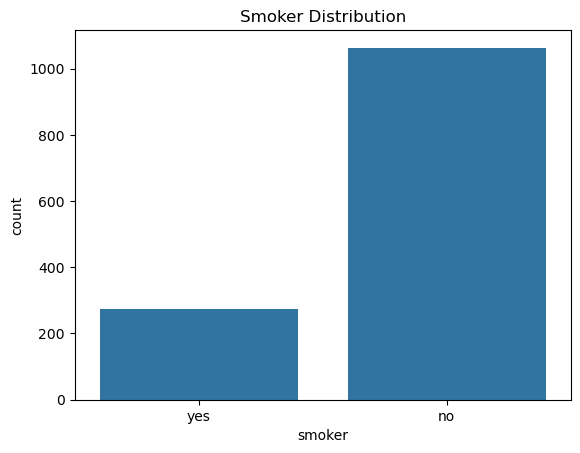

In [16]:
sns.countplot(x="smoker", data=df)
plt.title("Smoker Distribution")
plt.show()


### Smoker Distribution – Insights

- The dataset contains a **significantly higher number of non-smokers** compared to smokers.
- Although smokers represent a smaller portion of the data, smoking is known to have a **strong impact on medical insurance charges**, making it an important feature for prediction.
- The imbalance in smoker categories should be noted, but it does not pose a major issue for regression models.


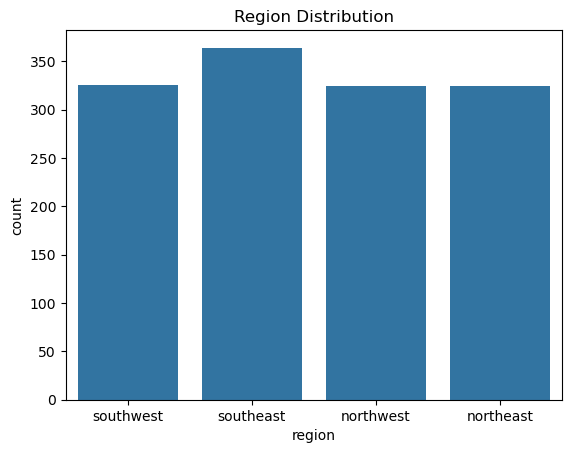

In [17]:
sns.countplot(x="region", data=df)
plt.title("Region Distribution")
plt.show()


### Region Distribution – Insights

- The dataset shows a **fairly balanced distribution across all regions**, with no region dominating the data.
- This balanced representation ensures that the model can learn patterns without strong regional bias.
- Since the counts are similar, **region alone may not be a strong predictor** of insurance charges compared to factors like smoking, age, or BMI.


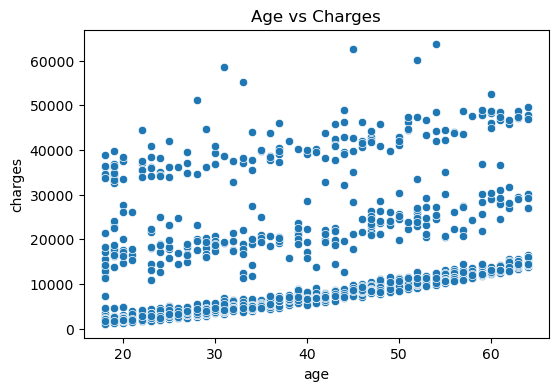

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="age", y="charges", data=df)
plt.title("Age vs Charges")
plt.show()


### Age vs Charges – Insights

- The scatter plot shows a **positive relationship** between age and insurance charges, indicating that medical costs generally increase as age increases.
- Younger individuals tend to have lower charges, while older individuals show a wider range of higher expenses.
- The variation in charges at similar ages suggests that **other factors such as smoking and BMI also significantly influence insurance costs**.


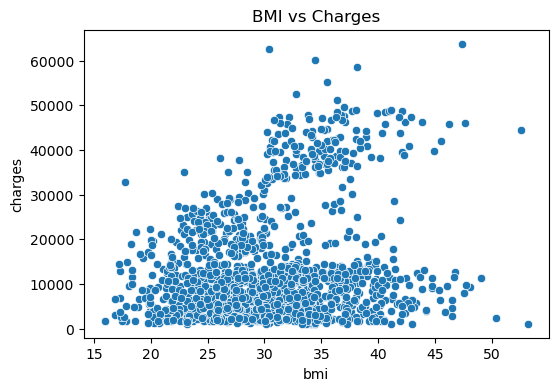

In [19]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="bmi", y="charges", data=df)
plt.title("BMI vs Charges")
plt.show()


### BMI vs Charges – Insights

- The scatter plot indicates that **insurance charges tend to increase with higher BMI values**, especially beyond a BMI of around 30.
- Individuals with higher BMI show greater variability and generally higher medical expenses.
- The spread of points suggests that **BMI is an important factor influencing charges**, though other variables such as smoking and age also contribute significantly.


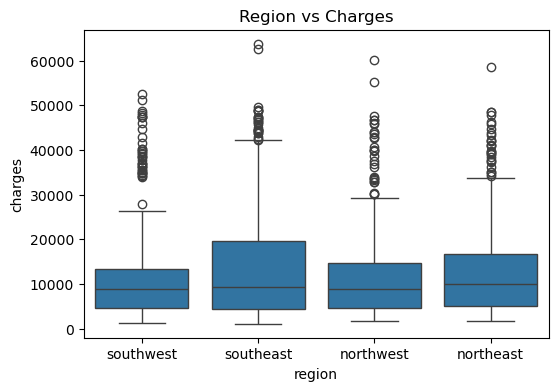

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x="region", y="charges", data=df)
plt.title("Region vs Charges")
plt.show()


### Region vs Charges – Insights

- Insurance charges appear to be **distributed similarly across all regions**, with comparable median values.
- While some regions show slightly higher variability, **no region shows a strong dominance in higher charges**.
- This suggests that **region is not a primary factor influencing insurance costs** compared to variables such as smoking status, age, or BMI.


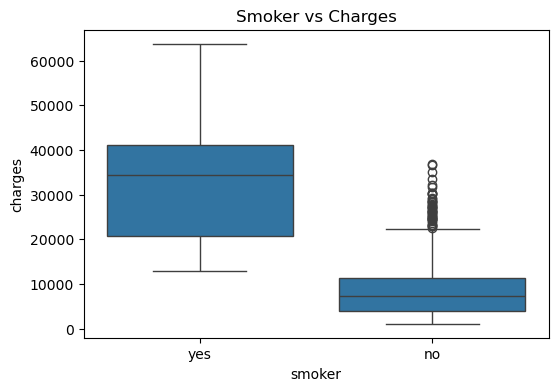

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Smoker vs Charges")
plt.show()


### Smoker vs Charges – Insights

- The boxplot shows a **significant difference in insurance charges** between smokers and non-smokers.
- Smokers tend to have **substantially higher median and overall charges** compared to non-smokers.
- This indicates that **smoking is one of the most influential factors** affecting medical insurance costs and is likely to be an important feature in predictive modeling.


In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Encoding categorical variable

In [23]:
# df['sex'] = df['sex'].map({'male':0,'female':1})
# df['smoker'] = df['smoker'].map({'no':0,'yes':1})

In [24]:
# df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])


In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [29]:
df['region'].value_counts()

region
2    364
3    325
1    324
0    324
Name: count, dtype: int64

`obsrvation`
- **region**
- southeast - 2
- southwest - 3
- northwest - 1
- northeast - 0
- **smoker**
- yes - 1
- no - 0
- **sex**
- female - 0
- male- 1


## model building

In [30]:
x = df.drop(columns=['charges'])
y = df['charges']

In [31]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [32]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Train Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state=42)

In [34]:
X_train.shape

(1002, 6)

In [35]:
X_test.shape

(335, 6)

### Feature scaling

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training Model

- KNN regression

In [37]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

- Linear regression

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

- SVM

In [39]:
svm = SVR()
svm.fit(X_train_scaled, y_train)

SVR()

- Decission Tree

In [40]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

- Random forest

In [41]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Evaluation matrix

In [2]:
def evaluate_model(y_test, y_pred, model_name):
    print(model_name)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("-" * 40)


In [42]:
knn_pred = knn.predict(X_test_scaled)
lr_pred = lr.predict(X_test)
svm_pred = svm.predict(X_test_scaled)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

evaluate_model(y_test,knn_pred,"KNN Regression")
evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test,svm_pred,"SVM regression")
evaluate_model(y_test, dt_pred, "Decision Tree")
evaluate_model(y_test, rf_pred, "Random Forest")

KNN Regression
MAE: 3135.9225966955214
MSE: 25737904.639376733
RMSE: 5073.253851265155
R2 Score: 0.8511483880743934
----------------------------------------
Linear Regression
MAE: 4063.0773793105795
MSE: 35229015.32733746
RMSE: 5935.403552188971
R2 Score: 0.7962578620326621
----------------------------------------
SVM regression
MAE: 8895.317100684893
MSE: 193057118.85549438
RMSE: 13894.499589963447
R2 Score: -0.11651914707108202
----------------------------------------
Decision Tree
MAE: 3179.4073541164175
MSE: 44420318.076843396
RMSE: 6664.856943464233
R2 Score: 0.7431012337394993
----------------------------------------
Random Forest
MAE: 2628.055187239402
MSE: 22775044.342995156
RMSE: 4772.320645450718
R2 Score: 0.8682836808344748
----------------------------------------


`observatio`
- Random Forest achieved highest R² score and lowest RMSE, indicating better generalization compared to other models.

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Tuned Random Forest (fast and simple)
rf = RandomForestRegressor(
    n_estimators=200,      # more trees = better stability
    max_depth=20,          # control overfitting
    min_samples_split=5,   # better generalization
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1              # faster training
)

rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, n_jobs=-1, random_state=42)

In [44]:
rf_pred = rf.predict(X_test)
evaluate_model(y_test, rf_pred, "Random Forest Tuned")

Random Forest Tuned
MAE: 2513.2148900787224
MSE: 20605073.96117066
RMSE: 4539.281216356909
R2 Score: 0.8808334044305144
----------------------------------------


## Hyperparameter Tuning Results (Random Forest)

To improve prediction performance, Random Forest hyperparameters such as **n_estimators**, **max_depth**, **min_samples_split**, and **min_samples_leaf** were tuned.

### Performance Comparison

| Metric | Before Tuning | After Tuning |
|--------|--------|--------|
| MAE | 2628.05 | 2513.21 |
| MSE | 22775044.34 | 20605073.96 |
| RMSE | 4772.32 | 4539.28 |
| R² Score | 0.8682 | 0.8808 |

### Observation

- Prediction error decreased after tuning.
- RMSE reduced, indicating better accuracy in medical cost estimation.
- R² score improved, meaning the model explains more variance in healthcare expenses.
- The tuned Random Forest model provides more reliable predictions compared to the default model.

### Conclusion

Hyperparameter tuning helped improve the Random Forest model’s performance and made it more suitable for **healthcare insurance cost prediction**.


In [45]:
with open("insurance_model_new.pkl", "wb") as f:
    pickle.dump(rf, f)

print("Model saved successfully!")

Model saved successfully!


In [76]:
with open("insurance_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("Model saved successfully!")

Model saved successfully!


## Conclusion

In this project, a **Machine Learning model** was developed to predict medical insurance charges using features such as age, BMI, children, smoking status, gender, and region.

### Work Done
- Data cleaning and preprocessing  
- Exploratory Data Analysis (EDA)  
- Encoding categorical variables  
- Training and evaluating multiple regression models  
- Saving the best model and building a Streamlit web app  

### Result
Among all models tested, the **Random Forest Regressor** performed the best, giving the highest accuracy and lowest error.

### Key Insights
- Smoking has a strong impact on insurance charges.  
- Charges generally increase with age and BMI.  
- Region has a smaller effect compared to other factors.

### Future Scope
- Hyperparameter tuning  
- More feature engineering  
- Using larger real-world datasets  

---

This project demonstrates an **end-to-end Machine Learning workflow**, from data analysis to model deployment.
